In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Train

In [66]:
df_desconhecidos = pd.read_csv("faces_desconhecidos-Copy1.csv")

In [67]:
df_conhecidos = pd.read_csv("faces.csv")

In [68]:
df_conhecidosval = pd.read_csv("faces_validation.csv")

In [69]:
df_conhecidos_final = pd.concat([df_conhecidos, df_conhecidosval])

In [70]:
df = pd.concat([df_desconhecidos, df_conhecidos_final])

In [71]:
df

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,target
0,-0.028100,1.874009,0.975083,0.602640,0.651621,0.387701,0.754534,0.255482,0.570138,0.232678,...,0.000564,-1.750562,-0.740965,-1.333565,0.424362,1.464125,0.441541,0.117519,0.773804,desconhecidos
1,0.281798,0.222542,-0.637775,-1.389234,-0.944202,1.170996,-2.149016,0.207373,1.258633,1.118211,...,-2.077074,0.061272,0.858069,-0.620240,-0.448048,0.659152,-0.578539,0.022662,-1.110150,desconhecidos
2,-0.469598,-0.438383,1.035088,0.419017,-2.502093,1.199449,1.220177,-0.849276,-2.125674,0.487827,...,-0.075716,-0.870743,-0.749646,-0.024553,0.895486,-0.095862,1.756820,-0.284382,1.243302,desconhecidos
3,-0.019212,0.063674,0.368226,-0.734526,-1.221279,-1.026126,2.541132,-0.602338,0.804724,-1.249530,...,-1.705541,1.118912,0.027196,0.776124,0.068407,-0.755236,-0.928870,-2.261591,-1.204839,desconhecidos
4,0.792076,-1.098803,-1.363440,-0.442606,-1.206599,0.595012,-0.013578,0.476706,-1.628913,-0.248366,...,-1.437911,0.343600,1.075108,0.339993,0.843487,0.041740,1.926534,-0.437672,0.653635,desconhecidos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,-0.515415,-0.364444,0.376679,-1.169360,-0.171952,-0.082919,0.334564,1.287003,0.722706,-0.145439,...,-0.337408,0.911319,0.387249,-0.663056,-0.548511,0.864339,-0.452718,0.657906,0.308859,Anita
136,-0.053085,-0.128445,-0.045827,-0.832958,-0.650303,0.017163,0.393169,1.088605,0.715595,-0.157572,...,-0.159320,1.508870,0.259740,-0.853419,-0.660579,0.600529,-0.557777,0.683590,0.084083,Anita
137,0.088084,0.431689,0.516850,-0.994467,-0.214396,0.053245,0.753357,0.683375,0.752360,0.049482,...,-0.217035,1.238264,-0.065421,-0.967712,-0.686561,0.367021,-0.701336,0.354293,0.018954,Anita
138,0.226625,-0.122337,-0.277066,-0.220689,-0.309456,0.359915,0.060279,-0.154357,-0.121863,-0.219565,...,0.005224,0.322420,-0.605390,-0.115777,0.365695,-0.089305,-0.025769,0.487779,0.257137,Anita


In [72]:
X = np.array(df.drop("target", axis=1))
y = np.array(df.target)

In [73]:
X

array([[-0.02810006,  1.874009  ,  0.9750827 , ...,  0.44154063,
         0.11751907,  0.7738039 ],
       [ 0.28179818,  0.22254208, -0.63777477, ..., -0.57853884,
         0.02266233, -1.1101495 ],
       [-0.4695979 , -0.4383834 ,  1.0350882 , ...,  1.7568198 ,
        -0.28438193,  1.2433019 ],
       ...,
       [ 0.08808435,  0.43168905,  0.5168505 , ..., -0.7013363 ,
         0.3542925 ,  0.01895424],
       [ 0.22662462, -0.12233733, -0.27706638, ..., -0.02576932,
         0.48777938,  0.25713694],
       [-0.87524796, -0.33509952,  0.11310824, ..., -0.32405397,
         1.172567  ,  0.56321496]])

In [74]:
y

array(['desconhecidos', 'desconhecidos', 'desconhecidos', ..., 'Anita',
       'Anita', 'Anita'], dtype=object)

In [75]:
print(X.shape)
print(y.shape)

(15488, 128)
(15488,)


# Misturando Tudo

In [76]:
from sklearn.utils import shuffle

In [77]:
X, y = shuffle(X, y, random_state=0)

# Split Dataset

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
trainX, valX, trainY, valY = train_test_split(X, y, test_size=0.30, random_state=42)

# Normalizando

In [80]:
from sklearn.preprocessing import Normalizer

In [81]:
norm = Normalizer(norm="l2")
trainX = norm.transform(trainX)
valX = norm.transform(valX)

# Tratando Labels

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
np.unique(trainY)

array(['Amanda', 'Anita', 'desconhecidos'], dtype=object)

In [84]:
classes = len(np.unique(trainY))
classes

3

## Discretizando

In [85]:
out_encoder = LabelEncoder()
out_encoder.fit(trainY)
trainY = out_encoder.transform(trainY)
np.unique(trainY)

array([0, 1, 2])

In [86]:
out_encoder = LabelEncoder()
out_encoder.fit(valY)
valY = out_encoder.transform(valY)
np.unique(valY)

array([0, 1, 2])

# Usando Keras

In [87]:
from tensorflow.keras.utils import to_categorical
trainY = to_categorical(trainY)
valY = to_categorical(valY)

In [88]:
print(valY[0])
print(trainY[0])

[0. 0. 1.]
[0. 0. 1.]


In [89]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [90]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(128,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 387       
Total params: 16,899
Trainable params: 16,899
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [92]:
batch_size=8
epochs= 40

history = model.fit(trainX, trainY, epochs=epochs, validation_data = (valX,valY), batch_size=batch_size)

Train on 10841 samples, validate on 4647 samples
Epoch 1/40
10841/10841 [==============================] - 3s 292us/sample - loss: 0.0870 - accuracy: 0.9836 - val_loss: 0.0188 - val_accuracy: 0.9933
Epoch 2/40
10841/10841 [==============================] - 3s 243us/sample - loss: 0.0164 - accuracy: 0.9946 - val_loss: 0.0120 - val_accuracy: 0.9957
Epoch 3/40
10841/10841 [==============================] - 3s 240us/sample - loss: 0.0089 - accuracy: 0.9969 - val_loss: 0.0069 - val_accuracy: 0.9981
Epoch 4/40
10841/10841 [==============================] - 2s 191us/sample - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.0064 - val_accuracy: 0.9981
Epoch 5/40
10841/10841 [==============================] - 2s 183us/sample - loss: 0.0049 - accuracy: 0.9989 - val_loss: 0.0044 - val_accuracy: 0.9987
Epoch 6/40
10841/10841 [==============================] - 3s 249us/sample - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.0040 - val_accuracy: 0.9985
Epoch 7/40
10841/10841 [===========================

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

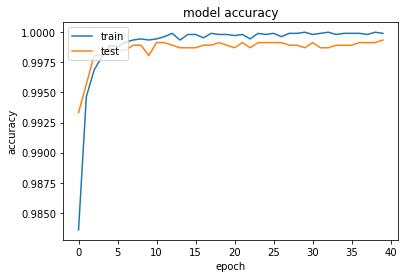

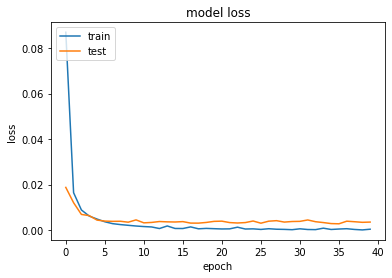

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [95]:
val_loss, val_accuracy = model.evaluate(valX, valY)

4647/4647 [==============================] - 0s 21us/sample - loss: 0.0035 - accuracy: 0.9994


In [96]:
yhat_val = model.predict(valX)

In [97]:
valY2 = np.argmax(valY, axis = 1)
yhat_val = np.argmax(yhat_val, axis = 1)

print(valY2[0])
print(yhat_val[0])

2
2


In [98]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(model_name, valY, yhat_val):
        
    cm = confusion_matrix(valY, yhat_val)
    total = sum(sum(cm))
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    
    print("MODELO : {}".format(model_name))
    print("Acurácia: {:.4f}".format(accuracy))
    print("Sensitividade: {:.4f}".format(sensitivity))
    print("Especificidade: {:.4f}".format(specificity))

    from mlxtend.plotting import plot_confusion_matrix
    fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
    plt.show()

MODELO : KERAS
Acurácia: 0.0329
Sensitividade: 0.9925
Especificidade: 1.0000


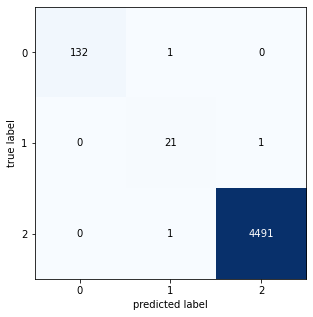

In [99]:
print_confusion_matrix("KERAS", valY2, yhat_val)

# Salvando o Modelo

In [100]:
model.save("faces_d.h5")